# import liberaries

In [1]:
import pandas as pd
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#load data

In [2]:
#load image and flatten it
data=[]
target=[]
img_show=[]
for i in range (1,43):
    path=f'../input/traffic-signs-classification/myData/{i}'
    #E:\New folder (3)\Downloads\archive (5)\myData\train\1
    paths=(os.listdir(path))
    a=0
    for d in paths:
        a+=1
        img=cv2.imread(os.path.join(path,d),0)
        if a==1:
            img_show.append(img)
            
        
        img= img.ravel()
        data.append(img)
        target.append(i)
        #if a==200:
            #break

#img=cv2.imread('00000_00005.jpg')


#show image

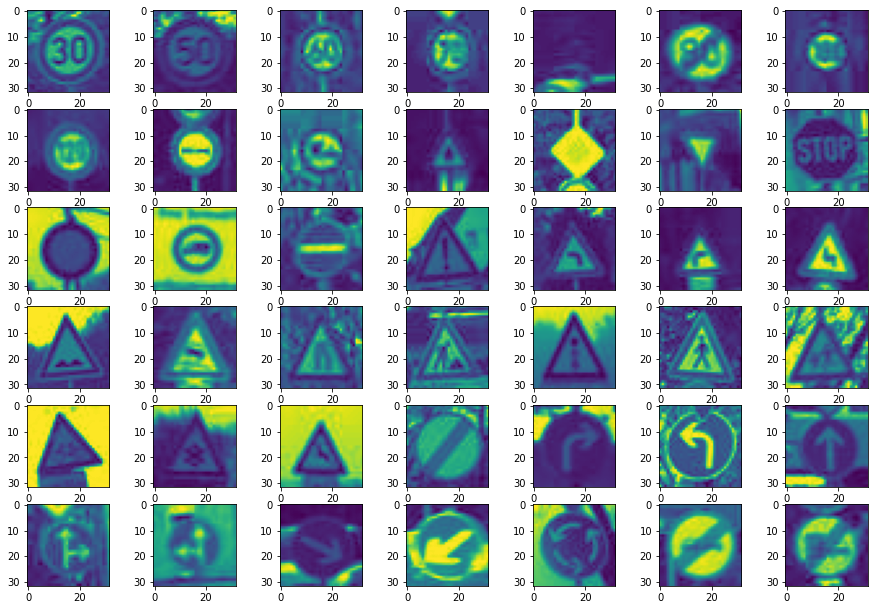

In [3]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(6,7)
index=-1
for row in range(6):
    for columns in range(7):
        index+=1
        
        axs[row,columns].imshow(img_show[index])
        


plt.subplots_adjust(left=0,right=2,bottom=0,top=2)
   



In [4]:
#convert data to data frame and scale data

In [5]:
data=pd.DataFrame(data)
target=pd.DataFrame(target)
data=data/127.5

In [6]:
print('data shape is ',data.shape)

data shape is  (72688, 1024)


In [7]:
data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.768627,0.682353,0.619608,0.643137,0.823529,0.988235,0.800000,0.384314,0.298039,0.407843,...,0.447059,0.431373,0.384314,0.392157,0.392157,0.384314,0.376471,0.368627,0.384314,0.400000
1,-0.078431,-0.243137,-0.556863,-0.337255,-0.039216,-0.023529,-0.007843,-0.039216,-0.031373,-0.015686,...,0.980392,0.658824,0.894118,-0.886275,-0.360784,-0.227451,-0.250980,-0.619608,0.658824,0.588235
2,0.415686,0.360784,0.627451,-0.839216,-0.384314,-0.133333,-0.047059,-0.078431,-0.321569,-0.337255,...,0.447059,0.431373,0.368627,0.368627,0.407843,0.454902,0.439216,0.368627,0.352941,0.384314
3,0.188235,0.180392,0.164706,0.141176,0.125490,0.141176,0.188235,0.235294,0.337255,0.360784,...,0.141176,0.133333,0.180392,0.141176,0.109804,0.101961,0.125490,0.149020,0.156863,0.149020
4,-0.007843,-0.015686,-0.007843,-0.007843,-0.023529,-0.039216,-0.031373,-0.007843,-0.007843,-0.007843,...,-0.047059,-0.007843,-0.047059,-0.007843,-0.007843,-0.400000,-0.431373,-0.454902,-0.454902,-0.423529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72683,0.156863,0.164706,0.156863,0.133333,0.125490,0.141176,0.156863,0.156863,0.266667,0.227451,...,0.149020,0.156863,0.125490,0.149020,0.172549,0.196078,0.196078,0.180392,0.164706,0.149020
72684,0.180392,0.172549,0.172549,0.164706,0.164706,0.156863,0.156863,0.156863,0.196078,0.188235,...,0.156863,0.164706,0.243137,0.266667,0.290196,0.282353,0.243137,0.211765,0.203922,0.203922
72685,-0.007843,-0.007843,-0.101961,-0.007843,-0.007843,-0.007843,-0.070588,-0.007843,-0.007843,-0.039216,...,-0.070588,-0.062745,-0.172549,-0.470588,-0.831373,0.925490,-0.980392,0.949020,0.988235,-0.243137
72686,0.196078,0.180392,0.164706,0.156863,0.180392,0.203922,0.196078,0.172549,0.227451,0.196078,...,0.203922,0.203922,0.211765,0.172549,0.180392,0.250980,0.305882,0.282353,0.211765,0.164706


#splite data to train and test data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=.2, stratify=target,random_state=44, shuffle =True)


# we want to learn how to use GridSearchCV and RandomizedSearchCV


In [9]:
#make GridSearchCV and fit model
parameters = {'n_neighbors':[x for x in range(0,5)],'weights':['uniform','distance']}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [0, 1, 2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [10]:
#get best score and hyper paramter
print(clf.best_score_)
print(clf.best_params_)
pd.DataFrame(clf.cv_results_)[['mean_test_score','std_test_score','params']]

0.8901117798796216
{'n_neighbors': 1, 'weights': 'uniform'}


,mean_test_score,std_test_score,params
0,NaN,NaN,"{'n_neighbors': 0, 'weights': 'uniform'}"
1,NaN,NaN,"{'n_neighbors': 0, 'weights': 'distance'}"
2,0.890112,0.001108,"{'n_neighbors': 1, 'weights': 'uniform'}"
3,0.890112,0.001108,"{'n_neighbors': 1, 'weights': 'distance'}"
4,0.818555,0.001745,"{'n_neighbors': 2, 'weights': 'uniform'}"
5,0.890112,0.001108,"{'n_neighbors': 2, 'weights': 'distance'}"
6,0.775684,0.002240,"{'n_neighbors': 3, 'weights': 'uniform'}"
7,0.831780,0.002050,"{'n_neighbors': 3, 'weights': 'distance'}"
8,0.737799,0.003081,"{'n_neighbors': 4, 'weights': 'uniform'}"
9,0.810163,0.002994,"{'n_neighbors': 4, 'weights': 'distance'}"


In [11]:
#make RandomizedSearchCV and fit model

parameters = {'n_neighbors':[x for x in range(30)],'weights':['uniform','distance']}
rand=RandomizedSearchCV(classifier,parameters,cv=5,scoring='accuracy',n_iter=5)
rand.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=5,
                   param_distributions={'n_neighbors': [0, 1, 2, 3, 4, 5, 6, 7,
                                                        8, 9, 10, 11, 12, 13,
                                                        14, 15, 16, 17, 18, 19,
                                                        20, 21, 22, 23, 24, 25,
                                                        26, 27, 28, 29],
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy')

In [12]:
#get best score and hyper paramter
print(rand.best_score_)
print(rand.best_params_)
pd.DataFrame(rand.cv_results_)[['mean_test_score','std_test_score','params']]

0.8101633705932931
{'weights': 'distance', 'n_neighbors': 4}


,mean_test_score,std_test_score,params
0,0.614652,0.003880,"{'weights': 'distance', 'n_neighbors': 28}"
1,0.506535,0.002774,"{'weights': 'uniform', 'n_neighbors': 26}"
2,0.810163,0.002994,"{'weights': 'distance', 'n_neighbors': 4}"
3,0.711505,0.002916,"{'weights': 'uniform', 'n_neighbors': 5}"
4,0.689785,0.002284,"{'weights': 'uniform', 'n_neighbors': 6}"


#predict test data

In [13]:
y_pred = rand.predict(X_test)

In [14]:
# perform confusion matrix and make report for accuracy

In [15]:
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[843   9   9 ...   1   4   0]
 [ 28 320  24 ...   1   1   2]
 [  3   7 442 ...   2   0   0]
 ...
 [  2   0   2 ... 107   0   0]
 [  0   2   0 ...   0  75   3]
 [  0   0   0 ...   0   7  77]]
              precision    recall  f1-score   support

           1       0.84      0.86      0.85       984
           2       0.81      0.61      0.70       522
           3       0.76      0.83      0.79       534
           4       0.85      0.83      0.84       750
           5       0.75      0.89      0.81       702
           6       0.77      0.95      0.85       156
           7       0.86      0.93      0.89       546
           8       0.90      0.89      0.90       534
           9       0.89      0.86      0.87       558
          10       0.85      0.91      0.88       762
          11       0.90      0.78      0.83       498
          12       0.81      0.85      0.83       798
          13       0.91      0.87      0.89       816
          14       0.95      0.71      0.81       2

show confusion matrix

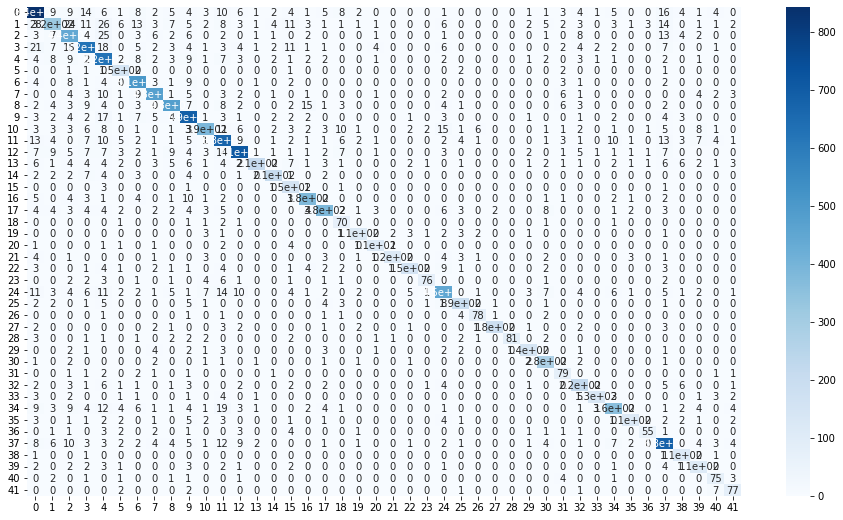

In [16]:
import seaborn as sn
import matplotlib.pyplot as plt
#sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.figure(figsize=(16,9))
sn.heatmap(confusion_matrix, annot=True, cmap=plt.cm.Blues)
plt.show()

thank you 